In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter
# импорт нужных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # подключаем датасет из sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
# сразу напишем код функции, которая будет вычислять все нужные метрики

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [4]:
# Читаем датасет
dataset = pd.read_csv('/content/CrabAgePrediction.csv', sep=',', encoding='cp1252')
dataset = dataset.sample(frac=0.01)

In [5]:
# Выводи первые 5 строк
dataset.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
440,M,1.3750,1.1250,0.4250,22.963095,8.986792,4.450871,6.236890,11
1344,F,1.5625,1.1875,0.3250,24.366395,9.057665,5.032036,6.803880,13
3750,I,0.9625,0.7250,0.2250,7.413394,3.146794,1.686795,2.112038,9
2797,F,1.3250,1.1000,0.3375,22.211833,8.873394,4.861939,6.194366,9
3350,M,1.8375,1.3875,0.5500,66.139383,35.139205,10.333393,17.562515,12


In [6]:
# Выводим информацию о датасете
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 440 to 2651
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             39 non-null     object 
 1   Length          39 non-null     float64
 2   Diameter        39 non-null     float64
 3   Height          39 non-null     float64
 4   Weight          39 non-null     float64
 5   Shucked Weight  39 non-null     float64
 6   Viscera Weight  39 non-null     float64
 7   Shell Weight    39 non-null     float64
 8   Age             39 non-null     int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 3.0+ KB


In [8]:
dataset["Sex"] = dataset["Sex"].astype('category')
dataset["Sex_ind"] = dataset["Sex"].cat.codes

In [9]:
# Выводим информацию о датасете
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 440 to 2651
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             39 non-null     category
 1   Length          39 non-null     float64 
 2   Diameter        39 non-null     float64 
 3   Height          39 non-null     float64 
 4   Weight          39 non-null     float64 
 5   Shucked Weight  39 non-null     float64 
 6   Viscera Weight  39 non-null     float64 
 7   Shell Weight    39 non-null     float64 
 8   Age             39 non-null     int64   
 9   Sex_ind         39 non-null     int8    
dtypes: category(1), float64(7), int64(1), int8(1)
memory usage: 2.9 KB


Text(0.5, 1.0, 'Корреляция Пирсона')

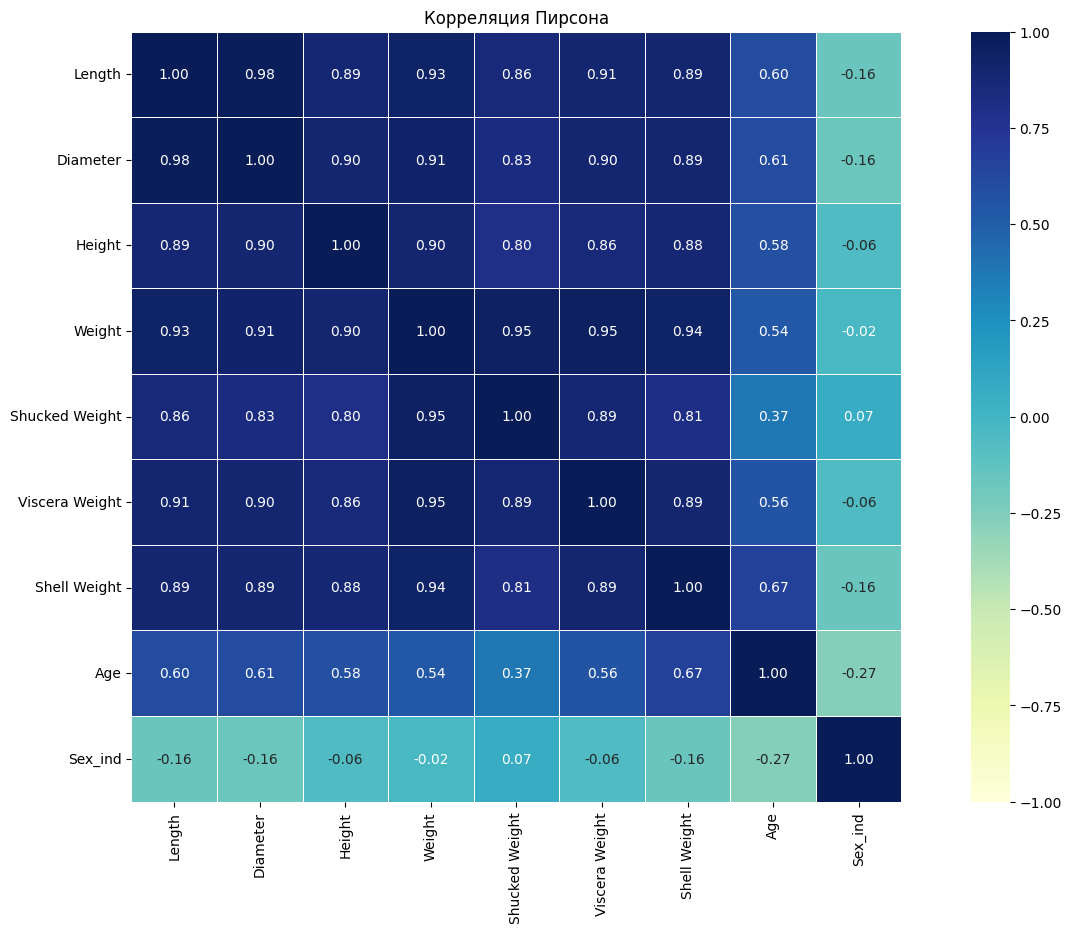

In [10]:
# Вычисляем матрицу корреляций
corr_matrix = dataset.copy()
plt.figure(figsize=(18,10),dpi=100)

corr_matrix = corr_matrix.corr(method="pearson",numeric_only = True)
# Визуализируем матрицу корреляции
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, square=True)
plt.title("Корреляция Пирсона")

In [11]:
# выведем названия фич
print(dataset.columns)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Sex_ind'],
      dtype='object')


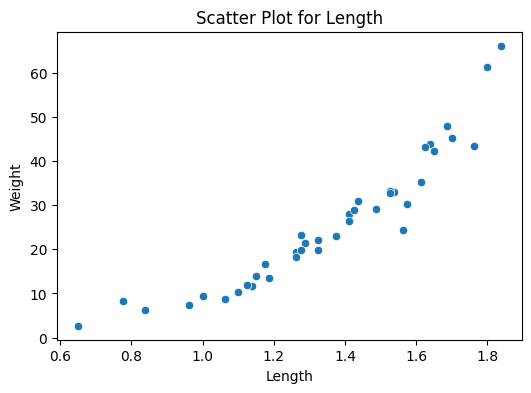

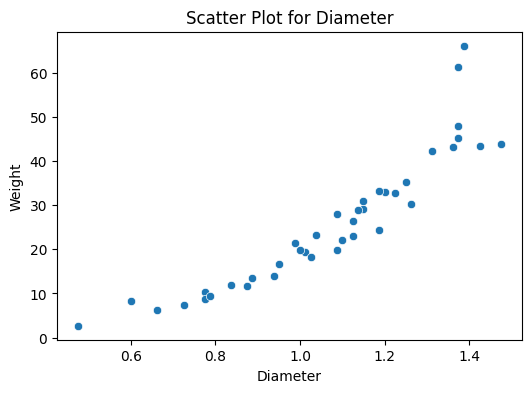

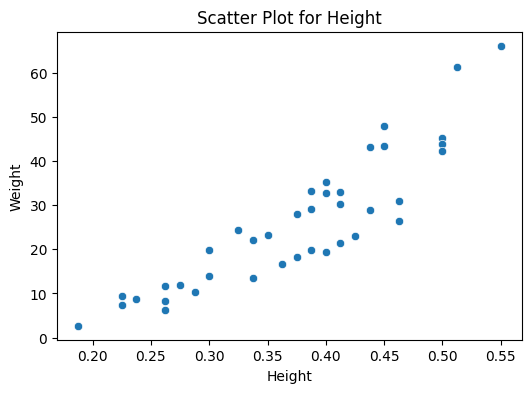

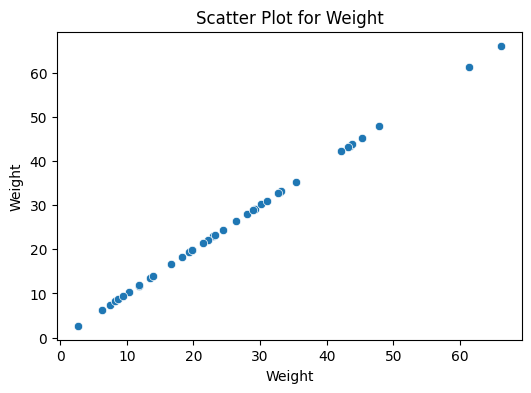

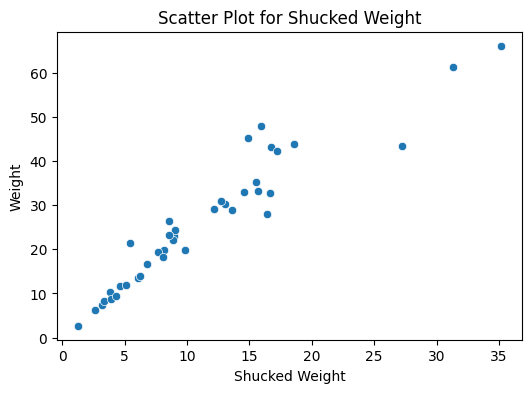

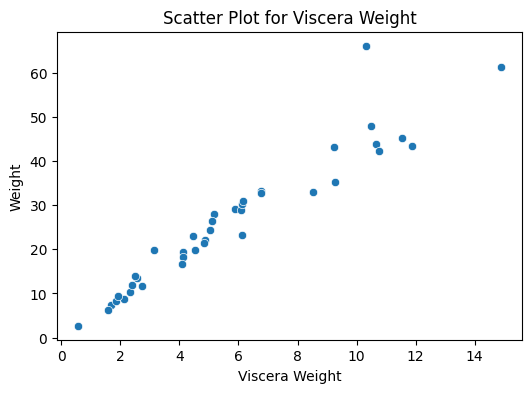

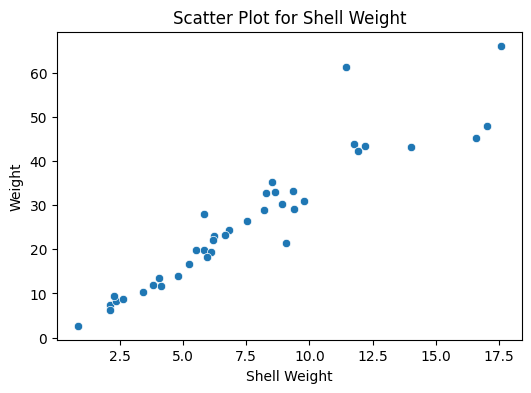

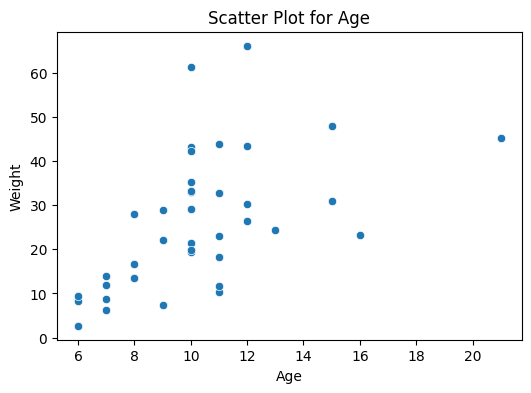

In [13]:
# нарисуем диаграммы рассеяния, чтобы лучше понять, как признаки (фичи) связаны с целевой переменной

# Фильтрация числовых столбцов для построения диаграмм рассеяния
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Построение диаграмм рассеяния для каждого столбца
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=dataset, x=col, y='Weight')  # y можно заменить другим столбцом, если не известно
    plt.title(f'Scatter Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Weight')  # Замените на целевой столбец, если он известен
    plt.show()

In [14]:
# подготавливаем датасет к обучению

X = dataset.drop(['Weight', 'Sex'], axis=1)
y = dataset['Weight']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (39, 8) | y shape: (39,) 


In [15]:
# делим датасет на трейн и тест

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

#Линейная регрессия

In [16]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

In [17]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  3.7232
  R2: 0.9415
 Adjusted R2: 1.4093
 Cross Validated R2: 0.9274


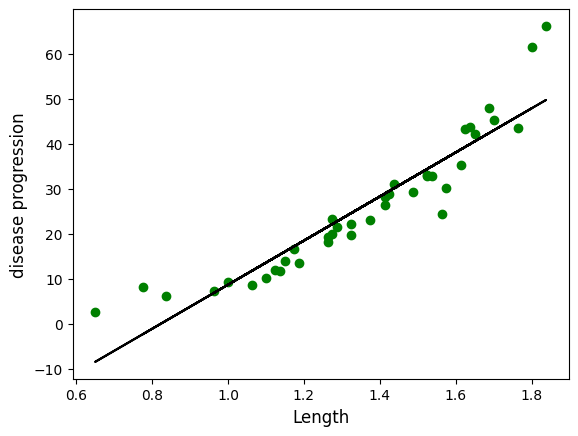

In [18]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = dataset['Length'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dataset['Weight'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('disease progression', size=12)
plt.xlabel('Length', size=12)
plt.show()

#Полиномиальная регрессия

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [20]:
# Create a linear regression model
modelPR = LinearRegression()

# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)

# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  127.7994
  R2: -56.2696
 Adjusted R2: 5.1174
 Cross Validated R2: -2.6126


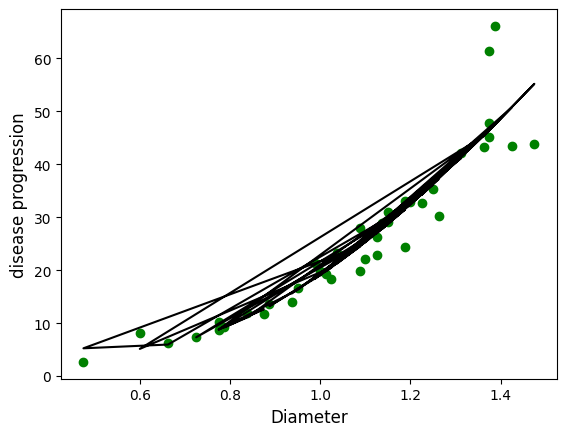

In [21]:
X2 = dataset['Diameter'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dataset['Weight'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('disease progression', size=12)
plt.xlabel('Diameter', size=12)
plt.show()

# Регрессия дерева принятия решений

Дерево решений является самым мощным и популярным инструментом для классификации и прогнозирования. Дерево принятия решений представляет собой древовидную структуру, похожую на блок-схему, где каждый внутренний узел обозначает тест по атрибуту, каждая ветвь представляет результат теста, а каждый конечный узел (терминальный узел) содержит метку класса. Существует непараметрический метод, используемый для моделирования дерева решений для прогнозирования непрерывного результата.

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

In [23]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  7.699
  R2: 0.75
 Adjusted R2: 2.7502
 Cross Validated R2: 0.84


In [24]:
from sklearn.ensemble import RandomForestRegressor

# Create a stepwise regression model
modelRF = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
modelRF.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  4.7108
  R2: 0.9064
 Adjusted R2: 1.6553
 Cross Validated R2: 0.9219


# Регрессия опорных векторов (SVR)

Регрессия опорных векторов (SVR) — это тип метода опорных векторов (SVM), который используется для задач регрессии. Он пытается найти функцию, которая наилучшим образом предсказывает непрерывное выходное значение для заданного входного значения.

SVR может использовать как линейные, так и нелинейные ядра. Линейное ядро — это простое скалярное произведение между двумя входными векторами, в то время как нелинейное ядро — это более сложная функция, которая может захватывать более сложные закономерности в данных. Выбор ядра зависит от характеристик данных и сложности задачи.

В пакете scikit-learn для Python вы можете использовать класс 'SVR' для выполнения SVR с линейным или нелинейным 'ядром'. Чтобы указать ядро, вы можете установить параметр ядра в 'linear' или 'RBF' (радиальная базисная функция).


Метод опорных векторов (SVM) — это   алгоритм контролируемого обучения, который может быть использован для задач классификации или регрессии. SVM пытаются найти гиперплоскость в многомерном пространстве, которое максимально разделяет различные классы или выходные значения.

Ядра: SVR может использовать различные типы ядер, которые представляют собой функции, определяющие сходство между входными векторами. Линейное ядро — это простое скалярное произведение между двумя входными векторами, в то время как нелинейное ядро — это более сложная функция, которая может захватывать более сложные закономерности в данных. Выбор ядра зависит от характеристик данных и сложности задачи.

Гиперпараметры: SVR имеет несколько гиперпараметров, которые можно настроить для управления поведением модели. Например, параметр 'C' управляет компромиссом между нечувствительными потерями и чувствительными потерями. Большее значение 'C' означает, что модель будет пытаться свести к минимуму нечувствительные потери в большей степени, в то время как меньшее значение C означает, что модель будет более снисходительной в отношении допускать большие ошибки.

Оценка модели: Как и в случае с любой моделью машинного обучения, важно оценить производительность модели SVR. Одним из распространенных способов сделать это является разделение данных на обучающий и тестовый наборы и использование обучающего набора в соответствии с моделью и тестового набора для ее оценки. Затем вы можете использовать такие метрики, как среднеквадратичная ошибка (MSE) или средняя абсолютная ошибка (MAE), чтобы измерить ошибку между прогнозируемыми и истинными выходными значениями.

In [25]:
from sklearn.svm import SVR

# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  5.1352
  R2: 0.8888
 Adjusted R2: 1.7786
 Cross Validated R2: -0.4726


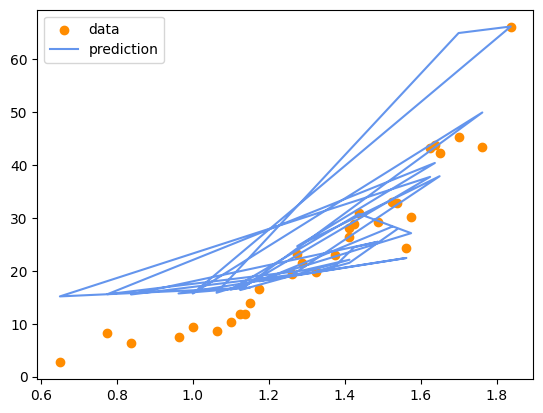

In [26]:
plt.scatter(X_train["Length"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Length"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [27]:
# Create a support vector regression model. Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  13.1646
  R2: 0.2689
 Adjusted R2: 6.1174
 Cross Validated R2: 0.4431


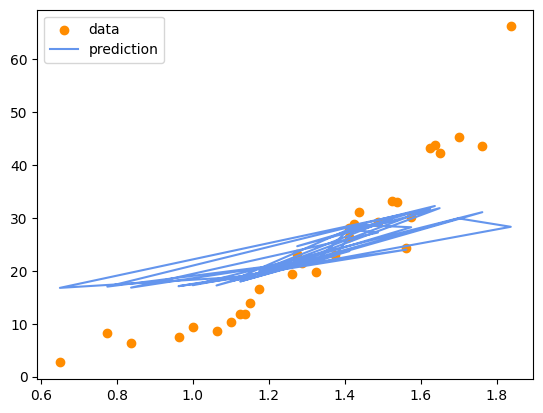

In [28]:
plt.scatter(X_train["Length"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Length"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

#Эластичная сеть

In [29]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  3.4116
  R2: 0.9509
 Adjusted R2: 1.3437
 Cross Validated R2: 0.9411


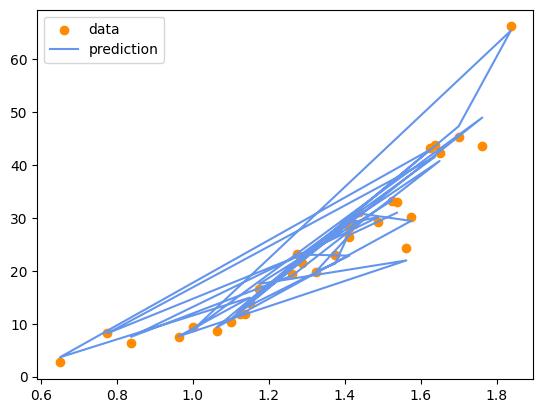

In [30]:
plt.scatter(X_train["Length"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Length"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()